In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [3]:
df = pd.read_csv('/content/drive/MyDrive/timeseries.csv', index_col='date', parse_dates=['date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [ ]:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


In [ ]:

df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [ ]:
df.value_counts()

value  
24828      2
64835      2
107960     2
48547      2
26987      2
          ..
44043      1
43990      1
43983      1
43914      1
1173655    1
Length: 1291, dtype: int64

In [ ]:
df.set_index('date')


,value
date,
2016-06-20,28508.0
2016-06-21,26805.0
2016-06-29,27734.0
2016-07-01,28372.0
2016-07-03,27011.0
...,...
2019-10-02,99416.0
2019-10-03,98737.0
2019-10-04,91873.0


In [4]:
df = df[(df['value'] >= df['value'].quantile(0.025)) &
        (df['value'] <= df['value'].quantile(0.975)) ]

Text(0, 0.5, 'Page Views')

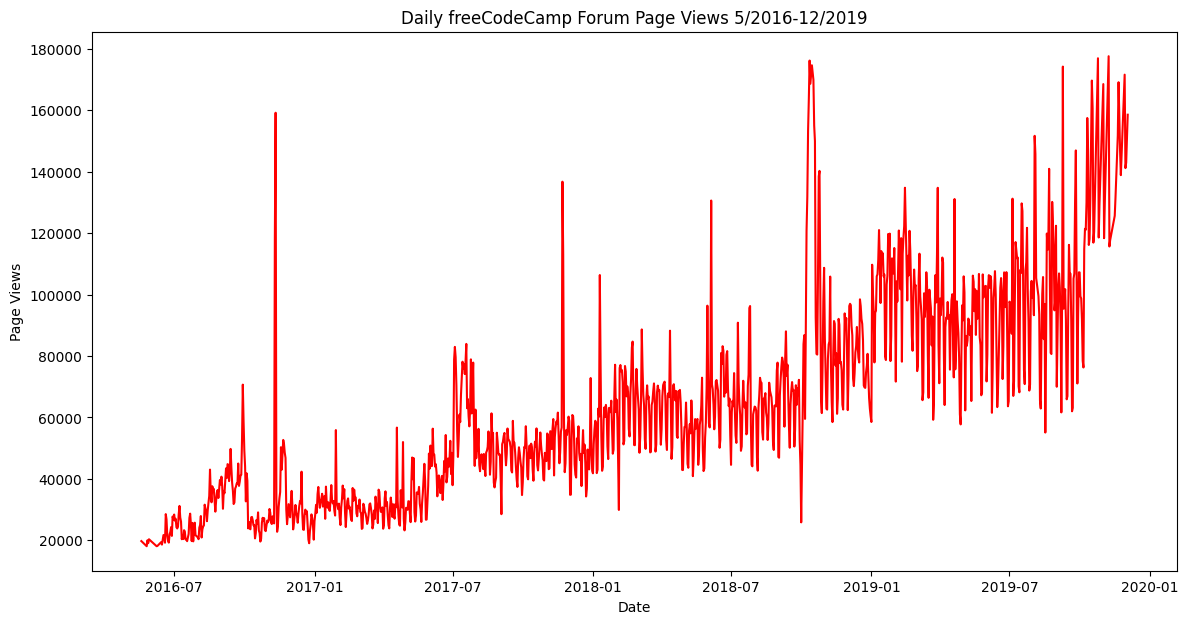

In [5]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(df.index, df['value'], color='red')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')


In [31]:
df['year']=df.index.year
df['year']

date
2016-05-19    2016
2016-05-26    2016
2016-05-27    2016
2016-05-28    2016
2016-05-29    2016
              ... 
2019-11-24    2019
2019-11-29    2019
2019-11-30    2019
2019-12-01    2019
2019-12-03    2019
Name: year, Length: 1238, dtype: int64

In [30]:
df['month']=df.index.month
df['month'] = df.index.strftime('%B')
df['month']

date
2016-05-19         May
2016-05-26         May
2016-05-27         May
2016-05-28         May
2016-05-29         May
                ...   
2019-11-24    November
2019-11-29    November
2019-11-30    November
2019-12-01    December
2019-12-03    December
Name: month, Length: 1238, dtype: object

In [37]:
group = df.groupby(['year','month'])
group = group.mean().reset_index()

group

,year,month,value
0,2016,August,31049.193548
1,2016,December,27832.419355
2,2016,July,24109.678571
3,2016,June,21875.105263
4,2016,May,19432.400000
5,2016,November,40448.633333
6,2016,October,27398.322581
7,2016,September,41476.866667
8,2017,April,30878.733333
9,2017,August,47712.451613


In [9]:
plt.figure(figsize=(17,7))

<Figure size 1700x700 with 0 Axes>

<Figure size 1700x700 with 0 Axes>

In [26]:
df_pivot = group.pivot_table(index='year', columns='month', values='value')


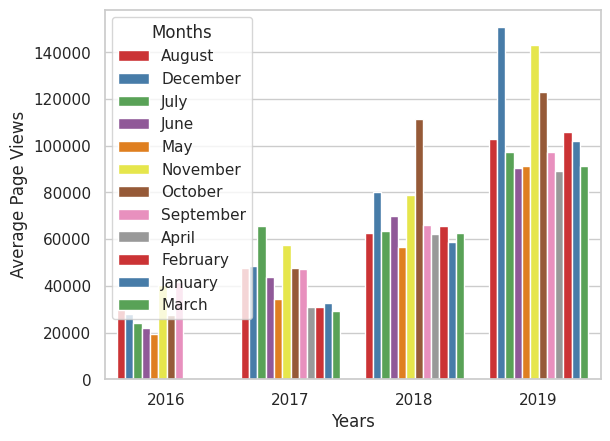

In [49]:

ax = sns.barplot(x=group['year'], y=group['value'], hue=group['month'], data=group, palette='Set1')
ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')
ax.legend(title='Months', loc='upper left')


In [50]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

Text(0, 0.5, 'Page views')

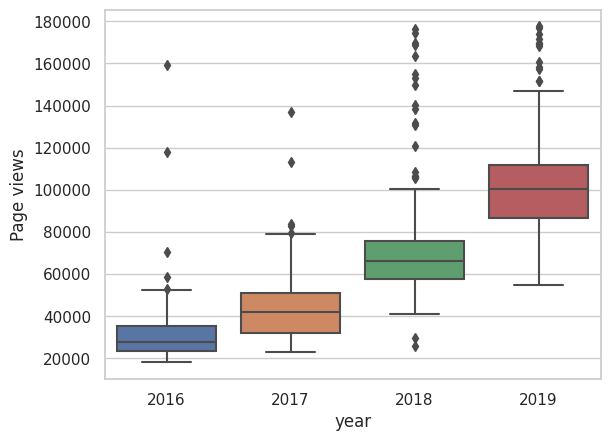

In [54]:
ax = sns.boxplot(data=df_box, x=df_box['year'],y=df_box['value'])
ax.set_ylabel('Page views')

Text(0, 0.5, 'Page views')

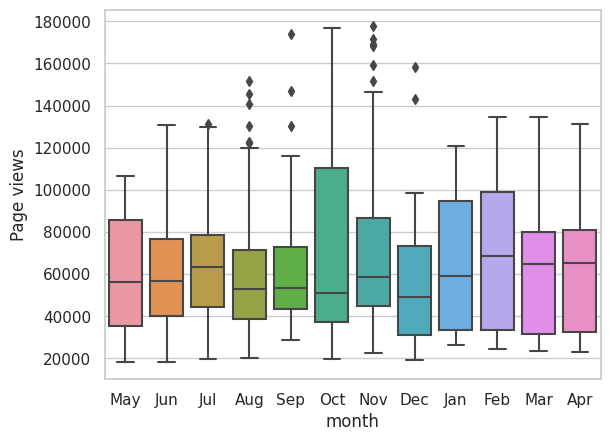

In [55]:
ax = sns.boxplot(data=df_box, x=df_box['month'],y=df_box['value'])
ax.set_ylabel('Page views')